# Diamond price prediction

*Выполнил Гущин Илья И.*

Data: https://www.kaggle.com/shivam2503/diamonds

_______

Исходная база данных содержит 53940 записей об алмазах. Требуется построить модель зависимости между ценой алмаза и его характеристиками.

Описание характеристик:
* price – цена в долларах США ($326 - $18823)
* carat – это физический вес алмаза, измеренный в каратах
* cut (Fair, Good, Very Good, Premium, Ideal) – качество огранки, которое оценивается сортировщиков бриллиантов
* color (от J (худшее) до D (лучшее)). Цвет бриллианта бывает многих оттенков. Бесцветные бриллианты – самые редкие
* clarity (I1 (худшее), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучшее)) – оценка чистоты алмаза
* x (длина), y (ширина), z (глубина) – размеры алмаза в миллиметрах
* depth – общая глубина в процентах, равная z / mean(x, y)
* table – ширина вершины алмаза относительно самой широкой части в процентах

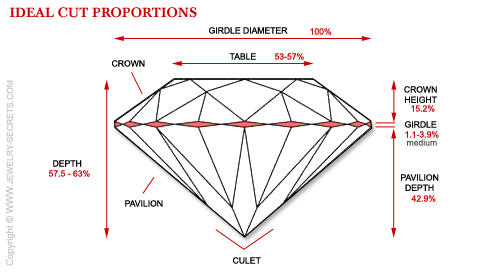

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('diamonds.csv', index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Анализ данных

In [51]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='price'>

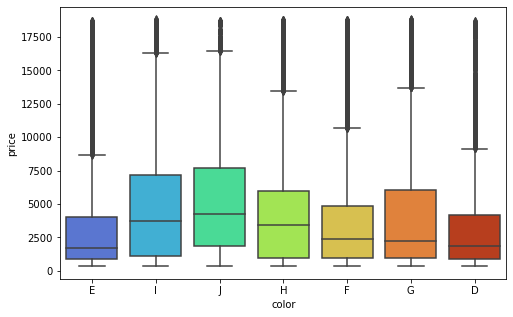

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='color', y='price', palette='turbo')

**Алмазы цвета J в среднем стоят дороже остальных, несмотря на то, что цвет J считается наименее ценным. Попробуем разобраться почему.**

In [53]:
df.groupby('color').agg('mean')

,carat,depth,table,price,x,y,z
color,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694582,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.757111,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836850,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845411
J,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251


**Получается, причина в том, что алмазы цвета J в среднем большего размера и веса, чем остальные.**

In [54]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

<AxesSubplot:xlabel='cut', ylabel='price'>

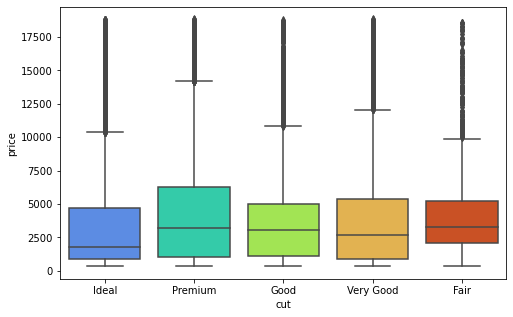

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='cut', y='price', palette='turbo')

**Странно, но алмазы идеального качества стоят в среднем дешевле, чем алмазы плохого качества. Возможно, причина также в размере, что алмазы идеального качества имеют маленький размер, поэтому они стоят дешевле?** 

In [56]:
df.groupby('cut').agg('mean')

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


**Да, действительно, алмазы идеального качества в среднем меньшего размера и веса, чем остальные.**

In [57]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

<AxesSubplot:xlabel='clarity', ylabel='price'>

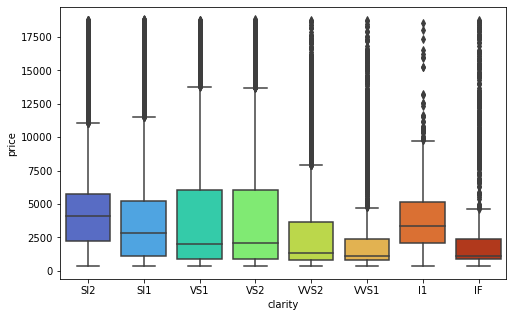

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='clarity', y='price', palette='turbo')

In [59]:
df.groupby('clarity').agg('mean')

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465


**Опять же, алмазы, имеющие высшие оценки очистки (IF, VVS1, VVS2) имеет в среднем меньшую стоимость из-за меньшего размера**

<AxesSubplot:>

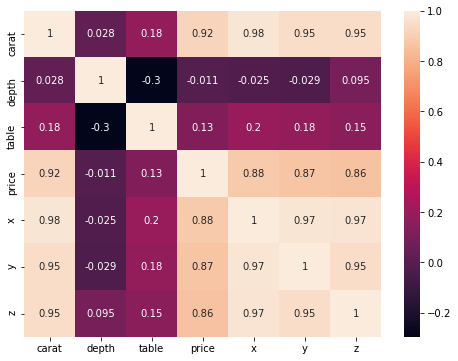

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

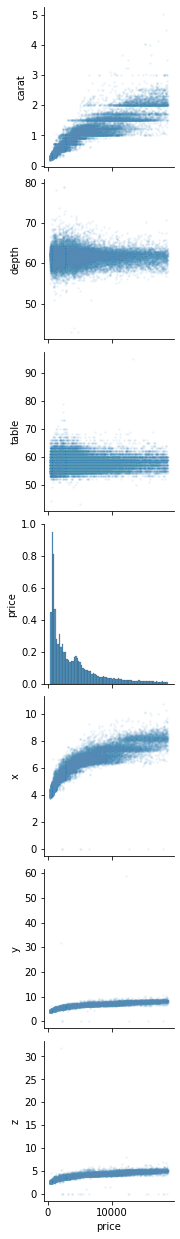

In [61]:
sns.pairplot(data=df, x_vars='price', plot_kws = {'alpha':0.1, 's': 5})

**Несмотря на то, что между price и carat, x, y, z высокие коэффициенты корреляции, по графикам видно, что связь между этими показателями нелинейная. Поэтому будем строить и линейную, и полиномиальную регрессию. Также обратим внимание на большое количество выбросов, отчисткой которых сейчас и займемся.**

# Предобработка данных

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 6.5+ MB


**Нулевых значений нет**

In [63]:
df.duplicated().sum()

146

In [64]:
df = df.drop_duplicates()

**Удалили 146 одинаковых строк**

In [65]:
round(df.describe(), 3)

,carat,depth,table,price,x,y,z
count,53794.000,53794.000,53794.000,53794.000,53794.000,53794.000,53794.000
mean,0.798,61.748,57.458,3933.065,5.731,5.735,3.539
std,0.473,1.430,2.234,3988.114,1.121,1.141,0.705
min,0.200,43.000,43.000,326.000,0.000,0.000,0.000
25%,0.400,61.000,56.000,951.000,4.710,4.720,2.910
50%,0.700,61.800,57.000,2401.000,5.700,5.710,3.530
75%,1.040,62.500,59.000,5326.750,6.540,6.540,4.030
max,5.010,79.000,95.000,18823.000,10.740,58.900,31.800


**У каких-то строк значения x, y, z равны 0, чего физически быть не может, поэтому удалить эти строкии**

In [66]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

**Удалим выбросы, т.е. строки, в которых хотя бы одно значение меньше 1-ой квантили или больше 99-ой**

In [67]:
numerical = (df.dtypes == "float64")
numerical_list = list(numerical[numerical].index)
print(numerical_list)

['carat', 'depth', 'table', 'x', 'y', 'z']


In [68]:
for i in range(len(numerical_list)):
    df = df[(df[numerical_list[i]] < df[numerical_list[i]].quantile(0.99)) 
                        & (df[numerical_list[i]] > df[numerical_list[i]].quantile(0.01))]

In [69]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
11,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
17,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Figure size 360x576 with 0 Axes>

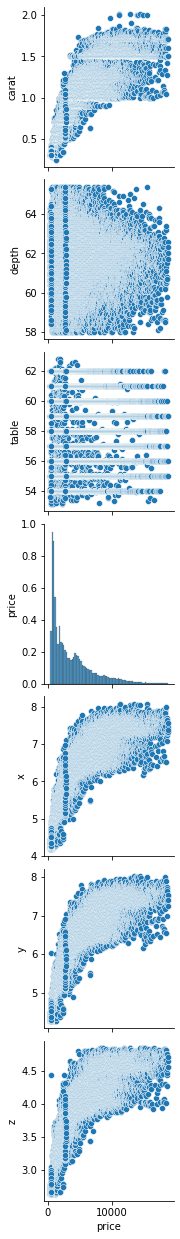

In [70]:
plt.figure(figsize=(5,8))
sns.pairplot(data=df,x_vars='price')
plt.show()

**Как видим, выбросов стало намного меньше, а нелинейность зависимости стала видна еще четче. В итоге осталось 46739 строк**

# Построение модели

In [71]:
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['cut', 'color', 'clarity']


In [72]:
df = pd.get_dummies(df)
df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
11,0.30,64.0,55.0,339,4.25,4.28,2.73,0,1,0,...,0,1,0,0,1,0,0,0,0,0
14,0.31,62.2,54.0,344,4.35,4.37,2.71,0,0,1,...,0,1,0,0,0,1,0,0,0,0
16,0.32,60.9,58.0,345,4.38,4.42,2.68,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17,0.30,62.0,54.0,348,4.31,4.34,2.68,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Будем использовать Grid Search, поэтому 10% для оценочных данных будет достаточно.**

In [73]:
from sklearn.model_selection import train_test_split
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

## Построение модели линейной регрессии

**Стандартизируем значения, то есть заменяем значения на их Z-score.**

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
X_test_scaled

array([[-0.48594588,  0.36251256, -1.19241284, ...,  1.7975094 ,
        -0.26734632, -0.3149941 ],
       [ 0.62645446,  0.78292663, -1.7134046 , ..., -0.55632533,
         3.74046662, -0.3149941 ],
       [ 1.09211042, -1.73955777,  1.9335377 , ..., -0.55632533,
        -0.26734632, -0.3149941 ],
       ...,
       [ 0.83341267,  0.69884381, -0.67142108, ..., -0.55632533,
        -0.26734632, -0.3149941 ],
       [-1.13269027,  0.44659537, -1.7134046 , ..., -0.55632533,
        -0.26734632,  3.17466266],
       [-0.97747162,  0.44659537, -2.02599965, ..., -0.55632533,
        -0.26734632, -0.3149941 ]])

In [77]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()

In [78]:
from sklearn.model_selection import GridSearchCV

**Создадим словарь значений, для которых и будем производить поиск.**

In [79]:
grid_params = {'alpha': [1, 3, 5, 10, 50, 100, 1000],
              'l1_ratio': [0.05, 0.1, 0.2, 0.5, 0.8, 0.95, 1]}
grid_model = GridSearchCV(param_grid = grid_params,estimator = model, scoring='neg_mean_squared_error', verbose=2)

In [80]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END .............................alpha=1, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.05; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=1,

C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1274343549.1929626, tolerance: 37723418.4458273
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1974037209.514408, tolerance: 38317483.06744756
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1487164329.076332, tolerance: 37957288.907515354
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1072705988.2449684, tolerance: 38020541.06817681
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 666762483.16082, tolerance: 37702146.72216995
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s
[CV] END .............................alpha=3, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=3, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=3, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=3, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=3, l1_ratio=0.05; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.2; total time=   0.0s
[CV] END ...................

C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46837766.70000839, tolerance: 38020541.06817681
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=3, l1_ratio=1; total time=   0.2s
[CV] END .............................alpha=5, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.05; total time=   0.0s
[CV] END .............................alpha=5, l1_ratio=0.05; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.0s
[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.05; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.05; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.05; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.05; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.05; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ...................

C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1635212877.4803505, tolerance: 47430864.83330304
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 3, 5, 10, 50, 100, 1000],
                         'l1_ratio': [0.05, 0.1, 0.2, 0.5, 0.8, 0.95, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [81]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

**Получаем оптимильным значение l1_ration = 1, то есть используется только L1-регуляризяция (Lasso)**

In [82]:
X_predict = grid_model.predict(X_test_scaled)

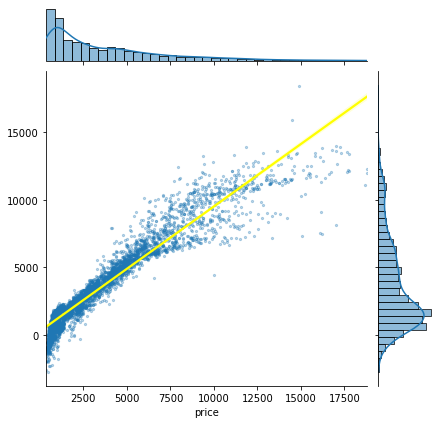

In [83]:
sns.jointplot(x=y_test,y=X_predict, kind='reg', 
             line_kws={"color": "yellow"}, scatter_kws={'s': 5, 'alpha' : 0.3})

In [84]:
import sklearn.metrics

In [85]:
MAE = sklearn.metrics.mean_absolute_error(y_test, X_predict)
print('Средняя абсолютная ошибка =', MAE)
MSE = sklearn.metrics.mean_squared_error(y_test, X_predict)
print('Средняя квадратическая ошибка ошибка =', MSE)
RMSE = MSE ** 0.5
print('Среднеквадратическая ошибка =', RMSE)
R2 = sklearn.metrics.r2_score(y_test, X_predict)
print("Коэффициент детерминации =", R2)

Средняя абсолютная ошибка = 667.9185675197123
Средняя квадратическая ошибка ошибка = 1009695.7405845622
Среднеквадратическая ошибка = 1004.8361759931627
Коэффициент детерминации = 0.9086940274468329


**Для линейной регрессии получаем точность в 91%.**

## Построение модели полиномиальной регрессии

In [86]:
from sklearn.preprocessing import PolynomialFeatures

**Больше 2ой степени брать не буду, чтобы долго не ждать опять же.**

In [87]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [88]:
poly_features = polynomial_converter.fit_transform(X)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.1, random_state=101)

**Оставим полученное значение alpha = 1, значения l1_ratio также сократим во избежание долгого ожидания.**

In [91]:
grid_params = {'alpha': [1],
              'l1_ratio': [0,  0.5,  1]}
grid_model = GridSearchCV(param_grid = grid_params,estimator = model, scoring='neg_mean_squared_error', verbose=2)

In [92]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15025893316.35394, tolerance: 37845729.78544188
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=0; total time=   6.0s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15373298494.527996, tolerance: 37958853.49847318
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=0; total time=   5.6s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15096184221.88582, tolerance: 37343761.87365752
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=0; total time=   5.4s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15244809951.624594, tolerance: 38410292.66018339
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=0; total time=   5.3s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15177459802.35145, tolerance: 38017973.434225366
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=0; total time=   5.3s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13757079885.402487, tolerance: 37845729.78544188
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   4.9s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14080385719.941278, tolerance: 37958853.49847318
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   4.8s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13834003028.997847, tolerance: 37343761.87365752
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   4.8s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13948813337.033657, tolerance: 38410292.66018339
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   5.0s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13898753133.571127, tolerance: 38017973.434225366
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   5.2s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6681879370.251161, tolerance: 37845729.78544188
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   4.5s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6780689172.90664, tolerance: 37958853.49847318
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   4.6s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6656411222.926353, tolerance: 37343761.87365752
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   4.4s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6723968640.342946, tolerance: 38410292.66018339
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   4.5s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6726859445.486944, tolerance: 38017973.434225366
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   4.7s


C:\Users\born-\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8403078241.028809, tolerance: 47394953.492832154
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1], 'l1_ratio': [0, 0.5, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [93]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

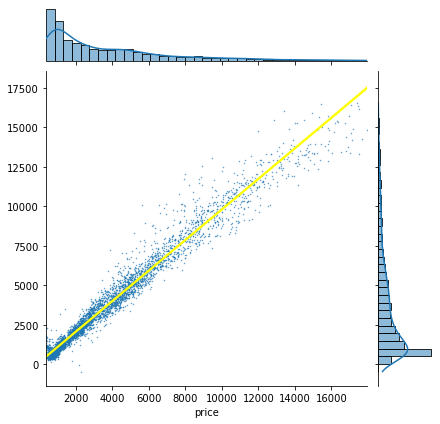

In [94]:
X_predict = grid_model.predict(X_test)
sns.jointplot(x=y_test,y=X_predict, kind='reg', 
             line_kws={"color": "yellow"}, scatter_kws={'s': 0.2})
plt.show()

In [95]:
MAE = sklearn.metrics.mean_absolute_error(y_test, X_predict)
print('Средняя абсолютная ошибка =', MAE)
MSE = sklearn.metrics.mean_squared_error(y_test, X_predict)
print('Средняя квадратическая ошибка ошибка =', MSE)
RMSE = MSE ** 0.5
print('Среднеквадратическая ошибка =', RMSE)
R2 = sklearn.metrics.r2_score(y_test, X_predict)
print("Коэффициент детерминации =", R2)

Средняя абсолютная ошибка = 367.2066537919167
Средняя квадратическая ошибка ошибка = 343710.30771397246
Среднеквадратическая ошибка = 586.2681193054697
Коэффициент детерминации = 0.969134775549011


***С помощью полиномиальной регрессии достигли точности 97%.***

**Итак, линейная регрессия - 91%, полиномиальная со степенью 2 - 97%**